1. Import required packages and dataset for project

In [1]:
#Import pandas as pd
import pandas as pd

#Importnumpy as np
import numpy as np

#Import matplotlib.pyplot as plt
import matplotlib.pyplot as plt

In [2]:
#Import closing_odds.csv from Kaggle
closing_odds = pd.read_csv ('closing_odds.csv',index_col = 0)

In [3]:
#Print closing_odds
closing_odds

,league,match_date,home_team,home_score,away_team,away_score,avg_odds_home_win,avg_odds_draw,avg_odds_away_win,max_odds_home_win,max_odds_draw,max_odds_away_win,top_bookie_home_win,top_bookie_draw,top_bookie_away_win,n_odds_home_win,n_odds_draw,n_odds_away_win
match_id,,,,,,,,,,,,,,,,,,
170088,England: Premier League,2005-01-01,Liverpool,0,Chelsea,1,2.9944,3.1944,2.2256,3.20,3.25,2.29,Paddy Power,Sportingbet,Expekt,9,9,9
170089,England: Premier League,2005-01-01,Fulham,3,Crystal Palace,1,1.9456,3.2333,3.6722,2.04,3.30,4.15,Pinnacle Sports,bet-at-home,Expekt,9,9,9
170090,England: Premier League,2005-01-01,Aston Villa,1,Blackburn,0,1.8522,3.2611,4.0144,2.00,3.40,4.50,Pinnacle Sports,Paddy Power,Sportingbet,9,9,9
170091,England: Premier League,2005-01-01,Bolton,1,West Brom,1,1.6122,3.4133,5.4722,1.67,3.57,6.27,Coral,Pinnacle Sports,Pinnacle Sports,9,9,9
170092,England: Premier League,2005-01-01,Charlton,1,Arsenal,3,5.9878,3.4778,1.5567,7.00,3.60,1.62,Expekt,Paddy Power,bet365,9,9,9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
876806,World: Club Friendly,2015-06-30,St. Gallen,1,Wacker Innsbruck,2,1.6838,3.8846,3.9813,1.83,4.20,4.33,188BET,bet365,Ladbrokes,24,24,24
876807,World: Club Friendly,2015-06-30,SW Harelbeke,1,Waregem,1,13.1165,7.8229,1.1053,19.00,9.00,1.13,BetVictor,bet365,Titanbet,17,17,17
876808,World: Club Friendly,2015-06-30,Torhout,0,Club Brugge,5,17.2256,12.6231,1.0288,22.00,15.00,1.05,BetVictor,Jetbull,BetVictor,16,16,16


In [ ]:
#Delete league column as it is not needed
closing_odds.drop(columns=["league"])

2. Create a column 'match_result' that determines home win, draw or away win based on the home and away scores

In [4]:
#Create a list of the results to be assigned for each match depending on its coutcome
values = ['home_win', 'draw', 'away_win']

#Create a list of conditions to decide the results
conditions = [
    (closing_odds["home_score"] > closing_odds["away_score"]),
    (closing_odds["home_score"] == closing_odds["away_score"]),
    (closing_odds["home_score"] < closing_odds["away_score"]),
    ]

#Create a new column and use np.select to assign values using our lists as arguments
closing_odds['match_result'] = np.select(conditions, values)

#Print closing_odds
closing_odds

,league,match_date,home_team,home_score,away_team,away_score,avg_odds_home_win,avg_odds_draw,avg_odds_away_win,max_odds_home_win,max_odds_draw,max_odds_away_win,top_bookie_home_win,top_bookie_draw,top_bookie_away_win,n_odds_home_win,n_odds_draw,n_odds_away_win,match_result
match_id,,,,,,,,,,,,,,,,,,,
170088,England: Premier League,2005-01-01,Liverpool,0,Chelsea,1,2.9944,3.1944,2.2256,3.20,3.25,2.29,Paddy Power,Sportingbet,Expekt,9,9,9,away_win
170089,England: Premier League,2005-01-01,Fulham,3,Crystal Palace,1,1.9456,3.2333,3.6722,2.04,3.30,4.15,Pinnacle Sports,bet-at-home,Expekt,9,9,9,home_win
170090,England: Premier League,2005-01-01,Aston Villa,1,Blackburn,0,1.8522,3.2611,4.0144,2.00,3.40,4.50,Pinnacle Sports,Paddy Power,Sportingbet,9,9,9,home_win
170091,England: Premier League,2005-01-01,Bolton,1,West Brom,1,1.6122,3.4133,5.4722,1.67,3.57,6.27,Coral,Pinnacle Sports,Pinnacle Sports,9,9,9,draw
170092,England: Premier League,2005-01-01,Charlton,1,Arsenal,3,5.9878,3.4778,1.5567,7.00,3.60,1.62,Expekt,Paddy Power,bet365,9,9,9,away_win
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
876806,World: Club Friendly,2015-06-30,St. Gallen,1,Wacker Innsbruck,2,1.6838,3.8846,3.9813,1.83,4.20,4.33,188BET,bet365,Ladbrokes,24,24,24,away_win
876807,World: Club Friendly,2015-06-30,SW Harelbeke,1,Waregem,1,13.1165,7.8229,1.1053,19.00,9.00,1.13,BetVictor,bet365,Titanbet,17,17,17,draw
876808,World: Club Friendly,2015-06-30,Torhout,0,Club Brugge,5,17.2256,12.6231,1.0288,22.00,15.00,1.05,BetVictor,Jetbull,BetVictor,16,16,16,away_win


3. Create a column 'max_odds_match_result' that selects what the max odds were for the correct result of each match

In [5]:
#Create a set of conditions to select the value from the correct column based on the corresponding value within the ‘match_result’ column
conditions_match_result = [closing_odds.match_result == "home_win", closing_odds.match_result == "draw", closing_odds.match_result == "away_win"]

avg_odds_select = [closing_odds.loc[closing_odds.index]['avg_odds_home_win'],  closing_odds.loc[closing_odds.index]['avg_odds_draw'],  closing_odds.loc[closing_odds.index]['avg_odds_away_win']]
closing_odds["avg_odds_match_result"] = np.select(conditions_match_result, avg_odds_select)

max_odds_select = [closing_odds.loc[closing_odds.index]['max_odds_home_win'],  closing_odds.loc[closing_odds.index]['max_odds_draw'],  closing_odds.loc[closing_odds.index]['max_odds_away_win']]
closing_odds["max_odds_match_result"] = np.select(conditions_match_result, max_odds_select)

#Print closing_odds
closing_odds

,league,match_date,home_team,home_score,away_team,away_score,avg_odds_home_win,avg_odds_draw,avg_odds_away_win,max_odds_home_win,...,max_odds_away_win,top_bookie_home_win,top_bookie_draw,top_bookie_away_win,n_odds_home_win,n_odds_draw,n_odds_away_win,match_result,avg_odds_match_result,max_odds_match_result
match_id,,,,,,,,,,,,,,,,,,,,,
170088,England: Premier League,2005-01-01,Liverpool,0,Chelsea,1,2.9944,3.1944,2.2256,3.20,...,2.29,Paddy Power,Sportingbet,Expekt,9,9,9,away_win,2.2256,2.29
170089,England: Premier League,2005-01-01,Fulham,3,Crystal Palace,1,1.9456,3.2333,3.6722,2.04,...,4.15,Pinnacle Sports,bet-at-home,Expekt,9,9,9,home_win,1.9456,2.04
170090,England: Premier League,2005-01-01,Aston Villa,1,Blackburn,0,1.8522,3.2611,4.0144,2.00,...,4.50,Pinnacle Sports,Paddy Power,Sportingbet,9,9,9,home_win,1.8522,2.00
170091,England: Premier League,2005-01-01,Bolton,1,West Brom,1,1.6122,3.4133,5.4722,1.67,...,6.27,Coral,Pinnacle Sports,Pinnacle Sports,9,9,9,draw,3.4133,3.57
170092,England: Premier League,2005-01-01,Charlton,1,Arsenal,3,5.9878,3.4778,1.5567,7.00,...,1.62,Expekt,Paddy Power,bet365,9,9,9,away_win,1.5567,1.62
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
876806,World: Club Friendly,2015-06-30,St. Gallen,1,Wacker Innsbruck,2,1.6838,3.8846,3.9813,1.83,...,4.33,188BET,bet365,Ladbrokes,24,24,24,away_win,3.9813,4.33
876807,World: Club Friendly,2015-06-30,SW Harelbeke,1,Waregem,1,13.1165,7.8229,1.1053,19.00,...,1.13,BetVictor,bet365,Titanbet,17,17,17,draw,7.8229,9.00
876808,World: Club Friendly,2015-06-30,Torhout,0,Club Brugge,5,17.2256,12.6231,1.0288,22.00,...,1.05,BetVictor,Jetbull,BetVictor,16,16,16,away_win,1.0288,1.05


4. Create a column 'top_bookie' that selects the bookie that offered the max odds for the correct result of each match

In [6]:
#Create a set of conditions to select the value from the correct column based on the corresponding value within the ‘match_result’ and 'max_odds_match_result' columns
conditions_match_result = [closing_odds.match_result == "home_win", closing_odds.match_result == "draw", closing_odds.match_result == "away_win"]
top_bookie_select = [ closing_odds.loc[closing_odds.index]['top_bookie_home_win'],  closing_odds.loc[closing_odds.index]['top_bookie_draw'],  closing_odds.loc[closing_odds.index]['top_bookie_away_win']]
closing_odds["top_bookie"] = np.select(conditions_match_result, top_bookie_select)

#Print closing_odds
closing_odds

,league,match_date,home_team,home_score,away_team,away_score,avg_odds_home_win,avg_odds_draw,avg_odds_away_win,max_odds_home_win,...,top_bookie_home_win,top_bookie_draw,top_bookie_away_win,n_odds_home_win,n_odds_draw,n_odds_away_win,match_result,avg_odds_match_result,max_odds_match_result,top_bookie
match_id,,,,,,,,,,,,,,,,,,,,,
170088,England: Premier League,2005-01-01,Liverpool,0,Chelsea,1,2.9944,3.1944,2.2256,3.20,...,Paddy Power,Sportingbet,Expekt,9,9,9,away_win,2.2256,2.29,Expekt
170089,England: Premier League,2005-01-01,Fulham,3,Crystal Palace,1,1.9456,3.2333,3.6722,2.04,...,Pinnacle Sports,bet-at-home,Expekt,9,9,9,home_win,1.9456,2.04,Pinnacle Sports
170090,England: Premier League,2005-01-01,Aston Villa,1,Blackburn,0,1.8522,3.2611,4.0144,2.00,...,Pinnacle Sports,Paddy Power,Sportingbet,9,9,9,home_win,1.8522,2.00,Pinnacle Sports
170091,England: Premier League,2005-01-01,Bolton,1,West Brom,1,1.6122,3.4133,5.4722,1.67,...,Coral,Pinnacle Sports,Pinnacle Sports,9,9,9,draw,3.4133,3.57,Pinnacle Sports
170092,England: Premier League,2005-01-01,Charlton,1,Arsenal,3,5.9878,3.4778,1.5567,7.00,...,Expekt,Paddy Power,bet365,9,9,9,away_win,1.5567,1.62,bet365
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
876806,World: Club Friendly,2015-06-30,St. Gallen,1,Wacker Innsbruck,2,1.6838,3.8846,3.9813,1.83,...,188BET,bet365,Ladbrokes,24,24,24,away_win,3.9813,4.33,Ladbrokes
876807,World: Club Friendly,2015-06-30,SW Harelbeke,1,Waregem,1,13.1165,7.8229,1.1053,19.00,...,BetVictor,bet365,Titanbet,17,17,17,draw,7.8229,9.00,bet365
876808,World: Club Friendly,2015-06-30,Torhout,0,Club Brugge,5,17.2256,12.6231,1.0288,22.00,...,BetVictor,Jetbull,BetVictor,16,16,16,away_win,1.0288,1.05,BetVictor


5. Create a histogram in matplotlib to show how often each bookie offered the max odds for the correct result 

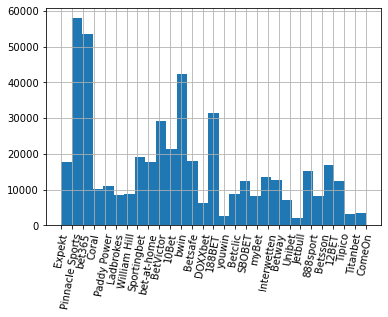

In [7]:
#Count number of different bookies
bookies_count = closing_odds['top_bookie'].nunique()

#Create a histogram 
hist_bookie = closing_odds['top_bookie'].hist(xrot=80, bins = bookies_count )

6. Display the bookie that offered the max odds for the correct result of each match on the most occasions

In [22]:
#Use the count() function to return the bookie that offered the max odds for the correct result of each match on the most occasions
bookies_mode = closing_odds['top_bookie'].mode()

#Define top_bookie
top_bookie=bookies_mode

#Print bookies_mode
top_bookie

0    Pinnacle Sports
dtype: object

7. Create a column 'pinaccle_odds' that selects the correct odds for matches where Pinnacle offered the max odds for the correct result and 0 if the conditions are not met. Use this column to compare 'pinaccle_odds' against the 'avg_odds_match_result' for matches where   Pinnacle offer the max odds on the correct result

In [ ]:
#Create a set of conditions to select the value from the correct column based on the corresponding value within the 'max_odds...' columns where top_bookie = Pinaccle Sports
pinaccle_odds = [closing_odds.loc[closing_odds.index]['max_odds_home_win'],  closing_odds.loc[closing_odds.index]['max_odds_draw'],  closing_odds.loc[closing_odds.index]['max_odds_away_win']]
pinaccle_odds_select = [closing_odds.top_bookie_home_win == "Pinnacle Sports" , closing_odds.top_bookie_draw == "Pinnacle Sports" , closing_odds.top_bookie_away_win == "Pinnacle Sports"]
closing_odds["pinaccle_odds"] = np.select(pinaccle_odds_select, pinaccle_odds)
closing_odds

In [12]:
#Find the average of 'pinnacle_odds' 
pinnacle_odds_mean = closing_odds[closing_odds['pinaccle_odds']>0]['pinaccle_odds'].mean()
pinnacle_odds_mean

3.78123025989788

In [13]:
#Find the average of 'avg_odds_match_result'
industry_avg = closing_odds[closing_odds['pinaccle_odds']>0]['avg_odds_match_result'].mean()
industry_avg

2.6990491996236896

In [14]:
#Create a Dictionary
odds_dict = dict()
key_Pinnacle = "Pinnacle" 
key_Industry = "Industry"

#Add values to the Dictionary
odds_dict[key_Pinnacle] = round(pinnacle_max_mean,2)
odds_dict[key_Industry] =  round(industry_avg,2)

#Display bar chart using Matplotlib
plt.bar(odds_dict.keys(), odds_dict.values(), width = 0.2)
plt.show()

8. Create a Dictionary to compare the % of matches where Pinnacle offered the max odds against the Industry

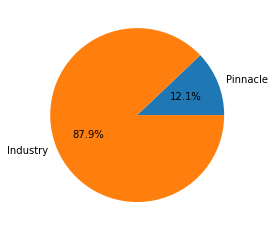

In [18]:
#Create a Dictionary
odds_bookie = dict()
key_Pinnacle = "Pinnacle" 
key_Industry = "Industry"

#Add values to the Dictionary
odds_bookie[key_Pinnacle] = closing_odds[closing_odds['top_bookie']=="Pinnacle Sports"]['top_bookie'].count()
odds_bookie[key_Industry] = closing_odds[closing_odds['top_bookie']!="Pinnacle Sports"]['top_bookie'].count()

#Display pie chart using Matplotlib
plt.pie(odds_bookie.values(), labels=odds_bookie.keys(), autopct='%1.1f%%')
plt.show()

9. Compare ROI of bets placed with Pinaccle vs bets placed on the industry avg odds on the same match. 
   The Hypothesis:
•for every match, look to see if Pinnacle Sports is offering the max odds for a particular result in this match
•if Pinnacle Sports is offering the max odds for any of the potential outcomes then we will bet on this
•if Pinnacle Sports is not offering max odds on any selection for a particular match, we will not bet on the outcome of the match in question

In [ ]:
# Define a function to calculate the ROI for a particular match 

def match_ROI (row, top_bookie):

  bets = 0
  gain = 0
  avg_gain = 0

  if row.top_bookie_home_win == top_bookie :
    bets = bets+10

  if row.top_bookie_draw == top_bookie :
    bets = bets+10

  if row.top_bookie_away_win == top_bookie :
    bets = bets+10

  if row.top_bookie == top_bookie :
    gain = 10*row.max_odds_match_result
    avg_gain = 10*row.avg_odds_match_result
    
  return [gain, bets, gain-bets, avg_gain, avg_gain-bets]

In [20]:
# Create a Loop over all matches to calculate the total ROI

# Initialise the variables for each total
total_gain = 0
total_bets = 0
total_result = 0
total_avg_result = 0

# Use Lists to track incremental bets and results to plot later
bucket_bets = [0]
bucket_results = [0]
bucket_avg_results = [0]
bets_incr = 10000
current_bets = 0 

for idx, row in closing_odds.sort_values('match_date').iterrows():
  [gain, bets, result, avg_gain, avg_result] = match_ROI(row, "Pinnacle Sports")
  total_gain = total_gain + gain
  total_bets = total_bets + bets
  total_result = total_result + result
  total_avg_result = total_avg_result + avg_result

  if (total_bets >= current_bets+bets_incr) :
    bucket_bets.append(total_bets)
    bucket_results.append(total_result)
    bucket_avg_results.append(total_avg_result)
    current_bets = total_bets

print(total_result, total_avg_result)

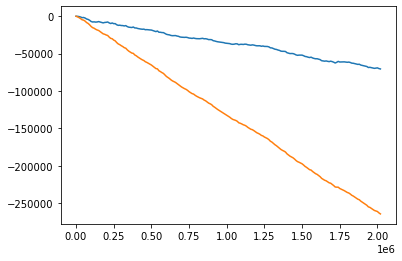

In [21]:
# Plot the results of Pinnacle Sports sgainst the industry average: 

plt.plot(bucket_bets, bucket_results, bucket_bets, bucket_avg_results)
#plt.legend([top_bookie,"industry"])